# Dataset Analysis
In this notebook, we perform multiple data analysis, which will help us understand more the dataset that we have built.


In [30]:
import pandas as pd
import collections
import matplotlib.pyplot as plt

In the following code, we will read the dataset we have:

In [31]:
all_genres_en = pd.read_csv('data/all_genres_en.csv').drop(columns='Unnamed: 0')
all_genres_en

,name,author,link,lyrics,chords,genre,actual_name,language
0,As Long As The Grass Shall Grow,Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,"As long, As the moon shall rise, As ...","['A', 'E', 'A', 'A', 'E', 'A', 'D', 'D', 'A', ...",Country,As Long As The Grass Shall Grow,en
1,Delias Gone (ver 4),Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,"Delia, oh, Delia Delia all my life\r\nIf I had...","['A', 'D', 'A', 'A7', 'D', 'B7', 'E', 'A', 'D'...",Country,Delias Gone,en
2,Mean Eyed Cat,Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,I gave my woman half my money at the general s...,"['E', 'B7', 'E', 'A7', 'B7', 'E', 'E', 'B7', '...",Country,Mean Eyed Cat,en
3,I Couldnt Keep From Crying,Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,"I SAW YOU WALKING BY HIS SIDE,\r\nHEARD YOU W...","['A', 'A7', 'D', 'A', 'E7', 'A', 'A7', 'D', 'A...",Country,I Couldnt Keep From Crying,en
4,It Aint Me Babe (ver 3),Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,Go 'way from my window leave at your own chose...,"['A', 'Bm', 'A', 'E', 'A', 'A', 'Bm', 'A', 'E'...",Country,It Aint Me Babe,en
...,...,...,...,...,...,...,...,...
23570,5150,Machine Gun Kelly,https://tabs.ultimate-guitar.com/tab/machine-g...,Bruises don't heal overnight\r\nI'm a few sips...,"['C', 'G', 'D', 'Em', 'C', 'G', 'D', 'Em', 'C'...",Rock,5150,en
23571,Fake Love Dont Last,Machine Gun Kelly,https://tabs.ultimate-guitar.com/tab/machine-g...,"I watched a movie scene, got déjà vu\r\n'Cause...","['Em', 'G', 'B', 'C', 'Em', 'G', 'B', 'C', 'Em...",Rock,Fake Love Dont Last,en
23572,Sid And Nancy,Machine Gun Kelly,https://tabs.ultimate-guitar.com/tab/machine-g...,I knew a girl who'd wear my t-shirts when she ...,"['D', 'F#m', 'E', 'D', 'F#m', 'E', 'D', 'F#m',...",Rock,Sid And Nancy,en
23573,Forever,Stereophonics,https://tabs.ultimate-guitar.com/tab/stereopho...,Sun beats down on my mind on a friday morning...,"['G', 'C', 'G', 'C', 'G', 'C', 'G', 'C', 'D', ...",Rock,Forever,en


Here the function convert_string_to_ngrams_list converts the list of chords (in the
way they are in the above dataset column 'chords') to n-gram list.

In [32]:
def convert_string_to_ngrams_list (chords_string, ngram = 4):
    """
    converts the list of chords to list of ngrams, each ngram is one list
    """
    in_bracket = False
    str = ''
    chords = []
    for i in chords_string:
        if in_bracket and i !='\'' :
            str += i
        if i == '\'' :
            in_bracket = not in_bracket
            if str != '' :
                chords.append(str)

            str = ''
    temp=zip(*[chords[i:] for i in range(0,ngram)])
    ans=[' '.join(ngram) for ngram in temp]

    return ans

Applying the previous function to the 'chords' column in the dataset, in order
to have n-grams instead of list of chords.

In [33]:
all_genres_en['chords'] = all_genres_en['chords'].apply(convert_string_to_ngrams_list)
all_genres_en

,name,author,link,lyrics,chords,genre,actual_name,language
0,As Long As The Grass Shall Grow,Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,"As long, As the moon shall rise, As ...","[A E A A, E A A E, A A E A, A E A D, E A D D, ...",Country,As Long As The Grass Shall Grow,en
1,Delias Gone (ver 4),Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,"Delia, oh, Delia Delia all my life\r\nIf I had...","[A D A A7, D A A7 D, A A7 D B7, A7 D B7 E, D B...",Country,Delias Gone,en
2,Mean Eyed Cat,Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,I gave my woman half my money at the general s...,"[E B7 E A7, B7 E A7 B7, E A7 B7 E, A7 B7 E E, ...",Country,Mean Eyed Cat,en
3,I Couldnt Keep From Crying,Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,"I SAW YOU WALKING BY HIS SIDE,\r\nHEARD YOU W...","[A A7 D A, A7 D A E7, D A E7 A, A E7 A A7, E7 ...",Country,I Couldnt Keep From Crying,en
4,It Aint Me Babe (ver 3),Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,Go 'way from my window leave at your own chose...,"[A Bm A E, Bm A E A, A E A A, E A A Bm, A A Bm...",Country,It Aint Me Babe,en
...,...,...,...,...,...,...,...,...
23570,5150,Machine Gun Kelly,https://tabs.ultimate-guitar.com/tab/machine-g...,Bruises don't heal overnight\r\nI'm a few sips...,"[C G D Em, G D Em C, D Em C G, Em C G D, C G D...",Rock,5150,en
23571,Fake Love Dont Last,Machine Gun Kelly,https://tabs.ultimate-guitar.com/tab/machine-g...,"I watched a movie scene, got déjà vu\r\n'Cause...","[Em G B C, G B C Em, B C Em G, C Em G B, Em G ...",Rock,Fake Love Dont Last,en
23572,Sid And Nancy,Machine Gun Kelly,https://tabs.ultimate-guitar.com/tab/machine-g...,I knew a girl who'd wear my t-shirts when she ...,"[D F#m E D, F#m E D F#m, E D F#m E, D F#m E D,...",Rock,Sid And Nancy,en
23573,Forever,Stereophonics,https://tabs.ultimate-guitar.com/tab/stereopho...,Sun beats down on my mind on a friday morning...,"[G C G C, C G C G, G C G C, C G C G, G C G C, ...",Rock,Forever,en


In the following code we build a dictionary to count how many times a specific n-gram appears
in the whole dataset:

In [34]:
ngrs_counter =collections.defaultdict(int)

for index, row in all_genres_en.iterrows():
    for ngram in row['chords']:
        if ngram in ngrs_counter :
            ngrs_counter[ngram] +=1
        else:
            ngrs_counter[ngram] =1


#ngrs_counter


### Most common 4-gram chords
In this section we explored the most common 4-gram chords and we got the following results:

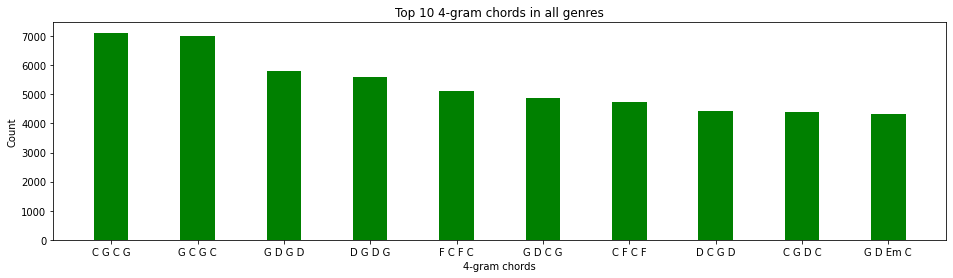

In [35]:
#plotting a histogram

df_ngrs_counter=pd.DataFrame(sorted(ngrs_counter.items(),key=lambda x:x[1],reverse=True))
pd1bi=df_ngrs_counter[0][:10]
pd2bi=df_ngrs_counter[1][:10]

plt.figure(1,figsize=(16,4))
plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)
plt.xlabel("4-gram chords")
plt.ylabel("Count")
plt.title("Top 10 4-gram chords in all genres")
plt.savefig("positive-bigram.png")
plt.show()


As many musicians know, the chord progression C G is very popular in western music,
and here we got the proof of that.


### Least common 4-gram chords
In this section we explored the least common 4-gram chords and we got the following results:

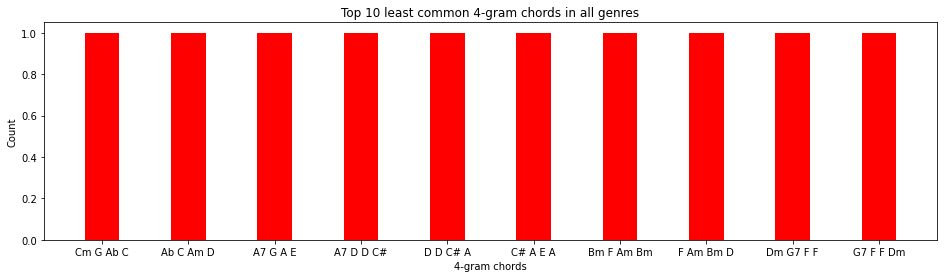

In [43]:
#plotting a histogram

df_ngrs_counter=pd.DataFrame(sorted(ngrs_counter.items(),key=lambda x:x[1],reverse=False))
pd1bi=df_ngrs_counter[0][:10]
pd2bi=df_ngrs_counter[1][:10]

plt.figure(1,figsize=(16,4))
plt.bar(pd1bi,pd2bi, color ='red',width = 0.4)
plt.xlabel("4-gram chords")
plt.ylabel("Count")
plt.title("Top 10 least common 4-gram chords in all genres")
plt.savefig("positive-bigram.png")
plt.show()

We can see that the least common chords appear only one time in the whole dataset,
which will make it hard for our model to anticpate them.


### Length of chords progression
In this section we will study the length of chords progression in our dataset. First, we will build a dictionary
to count how many times each length appears in our dataset.

In [48]:

def convert_string_to_chords_list (chords_string):
    """
    converts the list of chords (written as string) to list of chords
    """
    in_bracket = False
    str = ''
    chords = []
    for i in chords_string:
        if in_bracket and i !='\'' :
            str += i
        if i == '\'' :
            in_bracket = not in_bracket
            if str != '' :
                chords.append(str)

            str = ''
    return chords


all_genres_en_len = pd.read_csv('data/all_genres_en.csv').drop(columns='Unnamed: 0')
all_genres_en_len['chords'] = all_genres_en_len['chords'].apply(convert_string_to_chords_list)


length_counter =collections.defaultdict(int)

for index, row in all_genres_en.iterrows():
    chord_progression_len = len(row['chords'])
    if chord_progression_len in length_counter :
        length_counter[chord_progression_len] +=1
    else:
        length_counter[chord_progression_len] =1


#length_counter


And we get that the most common chord progression lengths are the following:

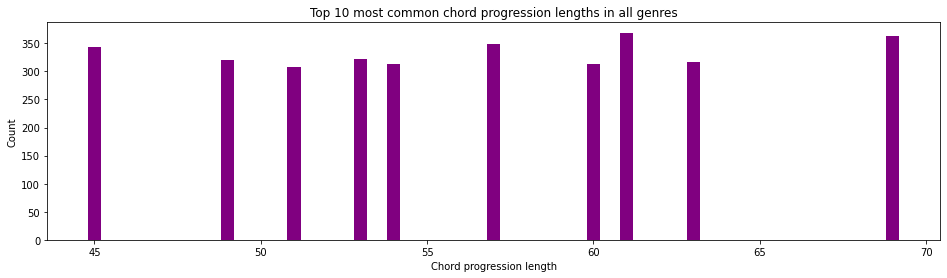

In [54]:
df_length_counter=pd.DataFrame(sorted(length_counter.items(),key=lambda x:x[1],reverse=True))
pd1bi=df_length_counter[0][:10]
pd2bi=df_length_counter[1][:10]

plt.figure(1,figsize=(16,4))
plt.bar(pd1bi,pd2bi, color ='purple',width = 0.4)
plt.xlabel("Chord progression length")
plt.ylabel("Count")
plt.title("Top 10 most common chord progression lengths in all genres")
plt.savefig("positive-bigram.png")
plt.show()

And the least common chord progression lengths are the following:

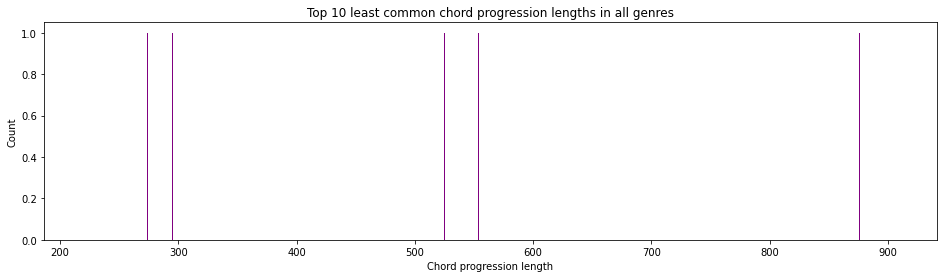

In [55]:
df_length_counter=pd.DataFrame(sorted(length_counter.items(),key=lambda x:x[1],reverse=False))
pd1bi=df_length_counter[0][:10]
pd2bi=df_length_counter[1][:10]

plt.figure(1,figsize=(16,4))
plt.bar(pd1bi,pd2bi, color ='purple',width = 0.4)
plt.xlabel("Chord progression length")
plt.ylabel("Count")
plt.title("Top 10 least common chord progression lengths in all genres")
plt.savefig("positive-bigram.png")
plt.show()



The histogram is not super clear because of the huge distance between the lengths, and using log
scaled axis didn't help as well, thus we will print the least common chords progression lengths who appeared only once:

In [57]:
pd1bi=df_length_counter[0][:10]
print(pd1bi)


0    435
1    907
2    221
3    554
4    274
5    294
6    876
7    525
8    223
9    295
Name: 0, dtype: int64
